In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import glob

In [2]:
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm
        #fm._rebuild()
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [4]:
df_path = glob.glob('./pre_data/*.csv')
df_path

['./pre_data\\경향_도쿄.csv',
 './pre_data\\도쿄(네이버).csv',
 './pre_data\\도쿄(다음).csv',
 './pre_data\\리우(네이버).csv',
 './pre_data\\서울신문_리우.csv',
 './pre_data\\서을신문_도쿄.csv']

In [6]:
df_list = []
for path in df_path:
    df = pd.read_csv(path)
    df = df.dropna()
    df = df.reset_index(drop=True)
    df_list.append(df)
data = pd.concat(df_list)

In [9]:
data['date'] = pd.to_datetime(data['date'])

In [17]:
date_group = data.groupby('date')
dates = pd.date_range('20210723' , '20210808')
dates_sr = pd.Series(index=dates)

for date in dates:
    try:
        date_df = date_group.get_group(date)
        dates_sr[date] = date_df.shape[0]
    except:
        dates_sr[date] = 0
dates_sr

C:\Users\jung0\anaconda3\envs\bigdata_project\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


2021-07-23     65.0
2021-07-24     73.0
2021-07-25    115.0
2021-07-26    120.0
2021-07-27    138.0
2021-07-28    132.0
2021-07-29    123.0
2021-07-30    121.0
2021-07-31     89.0
2021-08-01    100.0
2021-08-02    142.0
2021-08-03    113.0
2021-08-04    124.0
2021-08-05    115.0
2021-08-06    102.0
2021-08-07     87.0
2021-08-08     82.0
Freq: D, dtype: float64

<AxesSubplot:title={'center':'기간내 기사 갯수'}>

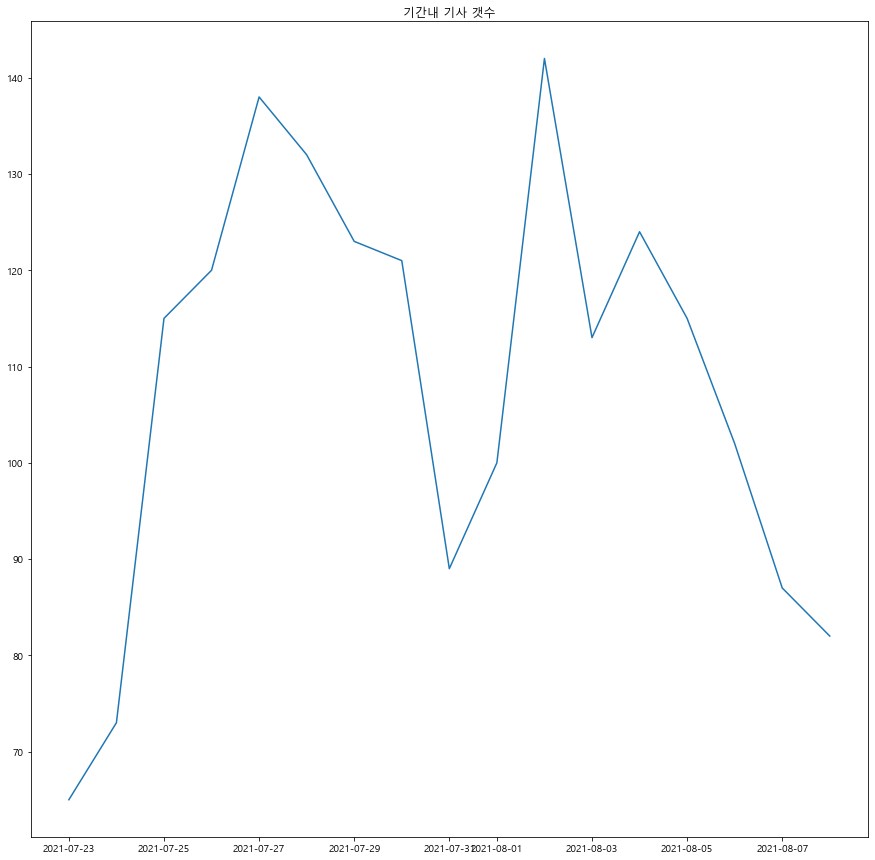

In [20]:
plt.figure(figsize=(15, 15))
plt.title('기간내 기사 갯수')
sns.lineplot(x=dates_sr.index, y=dates_sr.values)